In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import random
import sys
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
# np.random.seed(7)

# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten
# from keras.layers.convolutional import Conv2D, MaxPooling2D
# print('Keras version : ', keras.__version__)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)


Python version :  3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
TensorFlow version :  1.14.0


In [5]:
img_rows = 28 # 512/512 128/128
img_cols = 28 #이미지 사이즈 설정

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() # cifar10

input_shape = (img_rows, img_cols, 1)   #이미지 shape 설정 : 가로, 세로, 채널(흑백 -> 1, 컬러RGB -> 3)

print(x_train.shape[0])
print(x_test.shape[0])
#train -> 6만개
#test -> 1만개

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)   # (60000, 28, 28, 1) (이미지개수, 가로, 세로, 색상)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# print(x_train[0])

x_train = x_train.astype('float32') / 255. # 픽셀은 0에서 255의 값을 가지고 있음
x_test = x_test.astype('float32') / 255. #소숫점 255로 나눠주면 계산이 용이해짐


# print(x_train[0])


print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

batch_size = 128
num_classes = 10
#epochs = 12 # 학습을 몇 번 할 것 인가?
epochs = 3


y_train = tf.keras.utils.to_categorical(y_train, num_classes) #0에서부터 9까지의 카테고리를 정리해줌
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

60000
10000
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
model = Sequential() #차례대로 넣는다

model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same', #5x5사이즈의,stride(1,1),패딩있음
                 activation='relu', # relu함수
                 input_shape=input_shape)) #콘볼루션 실행

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2))) # 풀링(2,2) stride(2,2)

model.add(Conv2D(64, (2, 2), activation='relu', padding='same')) 

model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              3137000   
____

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1, 
                 validation_data=(x_test, y_test)) #학습이 잘 되었는지 검증하는 것, 학습이 개선되고 있으면 loss가 떨어짐

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 39s 657us/sample - loss: 0.0255 - acc: 0.9919 - val_loss: 0.0311 - val_acc: 0.9887
Epoch 2/3
60000/60000 [==============================] - 39s 658us/sample - loss: 0.0178 - acc: 0.9944 - val_loss: 0.0260 - val_acc: 0.9912
Epoch 3/3
60000/60000 [==============================] - 40s 664us/sample - loss: 0.0121 - acc: 0.9961 - val_loss: 0.0372 - val_acc: 0.9888


In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) #10000장의 테스트 중 9905장이 정확함
# 이미지파일, 모델 변경해서 0.7이상 만들어오기

Test loss: 0.02965142957222415
Test accuracy: 0.9905


C:\Users\WIN\Anaconda3\envs\tf\lib\random.py


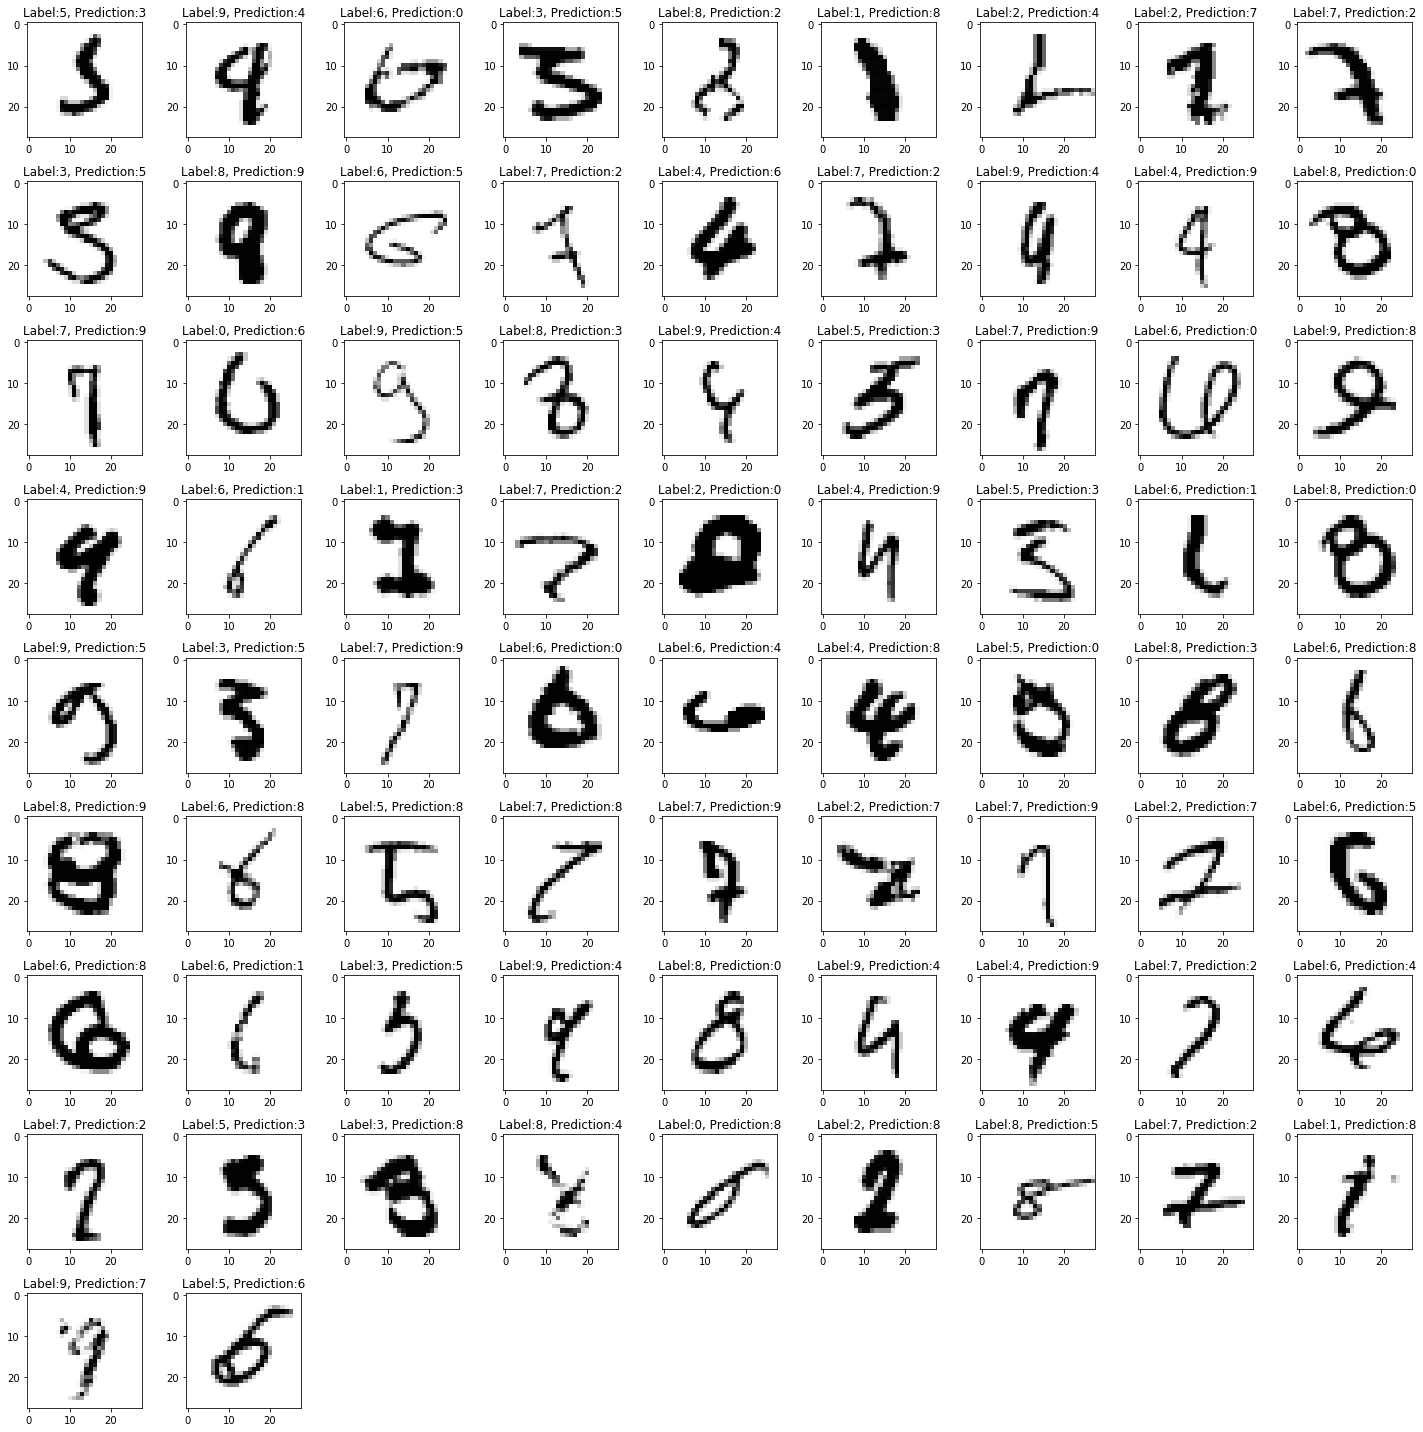

In [30]:

print (random.__file__)

import matplotlib.pylab as plt

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)

wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

# samples = random.choices(population=wrong_result, k=16)

count = 0
nrows = ncols = 9

plt.figure(figsize=(20,20))
    
for n in wrong_result :
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()

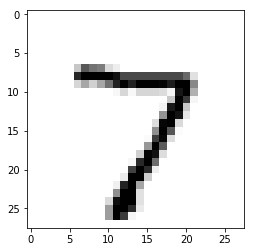

The Answer is  [7]


In [18]:
import matplotlib.pylab as plt
n = 0
plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

print('The Answer is ', model.predict_classes(x_test[n].reshape((1, 28, 28, 1))))